<a href="https://colab.research.google.com/github/adammoss/python-demo/blob/master/demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First import relevant modules

In [0]:
# Openpyxl (Excel library)
from openpyxl import load_workbook

In [0]:
# Pandas (data analysis library)
import pandas as pd

In [0]:
# Matplotlib (plotting library)
import matplotlib.pyplot as plt

In [0]:
# File input/output
from io import BytesIO
import urllib

In [0]:
# Location of sample Excel file (movie data from 1900's)
url = 'https://raw.github.com/adammoss/python-demo/master/movies.xlsx'

The following code shows the Excel file being read into the python Pandas data analysis library 

In [0]:
# Read into Pandas dataframe
df = pd.read_excel(url)

In [72]:
# Return head of dataframe
df.head()

,Title,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,Director,Actor 1,Actor 2,Actor 3,Facebook Likes - Director,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
0,Intolerance: Love's Struggle Throughout the Ages,1916,Drama|History|War,NaN,USA,Not Rated,123,1.33,385907.0,NaN,D.W. Griffith,Lillian Gish,Mae Marsh,Walter Long,204,436,22,9.0,481,691,1,10718,88,69.0,8.0
1,Over the Hill to the Poorhouse,1920,Crime|Drama,NaN,USA,NaN,110,1.33,100000.0,3000000.0,Harry F. Millarde,Stephen Carr,Johnnie Walker,Mary Carr,0,2,2,0.0,4,0,1,5,1,1.0,4.8
2,The Big Parade,1925,Drama|Romance|War,NaN,USA,Not Rated,151,1.33,245000.0,NaN,King Vidor,John Gilbert,Renée Adorée,Claire Adams,54,81,12,6.0,108,226,0,4849,45,48.0,8.3
3,Metropolis,1927,Drama|Sci-Fi,German,Germany,Not Rated,145,1.33,6000000.0,26435.0,Fritz Lang,Brigitte Helm,Gustav Fröhlich,Rudolf Klein-Rogge,756,136,23,18.0,203,12000,1,111841,413,260.0,8.3
4,Pandora's Box,1929,Crime|Drama|Romance,German,Germany,Not Rated,110,1.33,NaN,9950.0,Georg Wilhelm Pabst,Louise Brooks,Francis Lederer,Fritz Kortner,21,426,20,3.0,455,926,1,7431,84,71.0,8.0


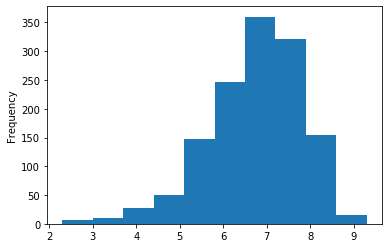

In [76]:
# Plot histogram of IMDB score
df['IMDB Score'].plot(kind="hist")
plt.show()

The following code shows the Excel file being read into the python openpyxl Excel library



In [0]:
# Load Excel workbook
wb = load_workbook(BytesIO(urllib.request.urlopen(url).read()))


In [0]:
# Get the active sheet
ws = wb.active